**Import all the required libraries**

In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df=pd.read_csv("/content/Precily_Text_Similarity.csv")
df.head()

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...


In [ ]:
len(df["text1"][0].split())

403

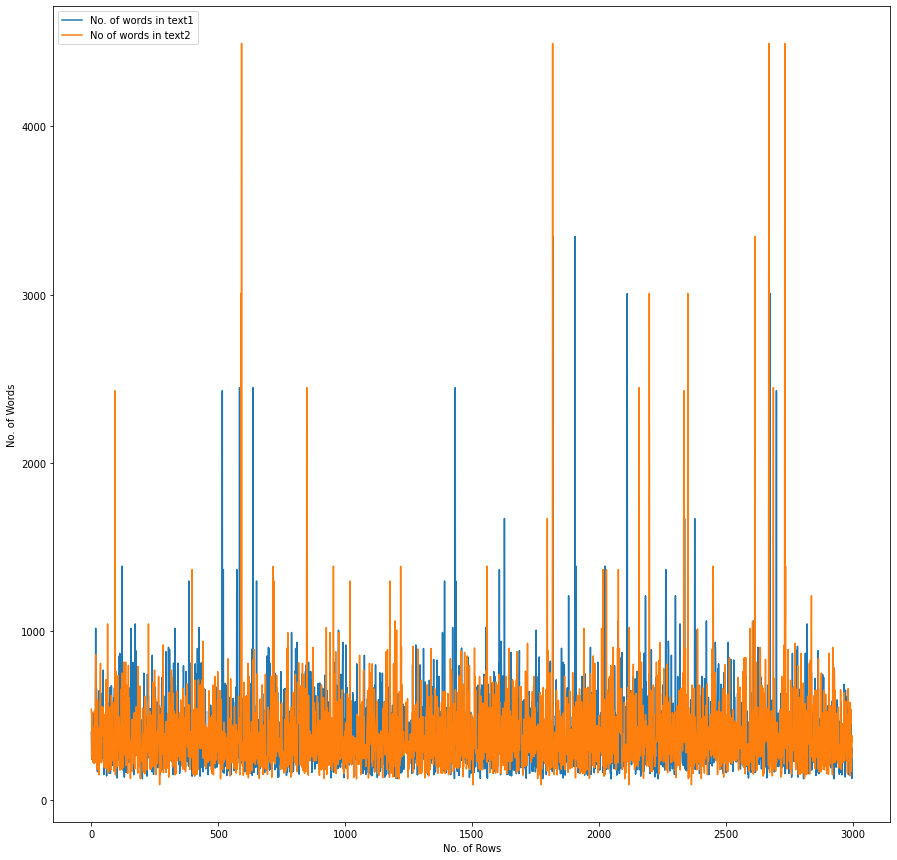

In [ ]:
plt.figure(figsize=(15,15))
size_para_text1=df["text1"].apply(lambda x:len(x.split()))
size_para_text2=df["text2"].apply(lambda x:len(x.split()))
points_x=np.arange(len(size_para_text1))
plt.plot(points_x,size_para_text1)
plt.plot(points_x,size_para_text2)
plt.legend(['No. of words in text1','No of words in text2'])
plt.xlabel("No. of Rows")
plt.ylabel("No. of Words")
plt.show()

In [ ]:
stopword_list= stopwords.words('english')

def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, ' ', text)
    return text

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer(language='english')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    #print("lemmas",lemma)
    return lemmas

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words



In [ ]:
def normalize_and_lemmaize(input):
    sample = remove_special_characters(input)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    #words = stem_words(words)
    lemmas = lemmatize_verbs(words)
    lemmas = ' '.join(lemmas)
    lemmas = re.sub(".xx."," ",lemmas)

    return ' '.join( [w for w in lemmas.split() if (len(w)>2 or w =='mf') ]  )

In [ ]:
df['text1'] = df['text1'].map(lambda text: normalize_and_lemmaize(text))

In [ ]:
df['text2'] = df['text2'].map(lambda text: normalize_and_lemmaize(text))

In [ ]:
df.head()

,text1,text2
0,broadband challenge view number europeans broa...,gardener win double glasgow britain jason gard...
1,rap boss arrest drug find rap mogul marion sug...,amnesty chief lament war failure lack public o...
2,player burn worry robinson england coach andy ...,hanks greet wintry premiere hollywood star tom...
3,hearts oak cotonsport hearts oak set ghanaian ...,redford vision sundance despite sport corduroy...
4,sir paul rock super bowl crowd sir paul mccart...,mauresmo open victory amelie mauresmo maria sh...


In [ ]:
from collections import Counter
import gensim
from gensim.models import Word2Vec
SEED = 42

In [ ]:
tokenized_docs1 =  [ i.split(' ') for i in df["text1"].values]
tokenized_docs2 =  [ i.split(' ') for i in df["text2"].values]
tokenized_docs=[]
tokenized_docs.extend(tokenized_docs1)
tokenized_docs.extend(tokenized_docs2)

In [ ]:
model = Word2Vec(sentences=tokenized_docs, size=800, workers=1, seed=SEED)

**Taking user input**

In [ ]:
number=2000
text1=df["text1"].values[number]
text2=df["text2"].values[number]
text1=normalize_and_lemmaize(text1)
text2=normalize_and_lemmaize(text2)

In [ ]:
size_model=model.vector_size
vect_zeros=np.zeros(size_model)
def word_vector(text,model):
  vect=[]
  for word in text.split():
    if word in model:
      vect.append(model[word])
    else:
      vect.append(vect_zeros)

  vect=np.array(vect).mean(axis=1)
  return vect

In [ ]:
vect_1=word_vector(text1,model)
vect_2=word_vector(text2,model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [ ]:
vect_2.shape

(260,)

In [ ]:
if len(vect_1)>len(vect_2):
  vect_1=vect_1[:len(vect_2)] 
elif len(vect_1)<len(vect_2):
  vect_2=vect_2[:len(vect_1)] 

In [ ]:
vect_1=vect_1.reshape(1,-1)
vect_2=vect_2.reshape(1,-1)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vect_1,vect_2)

In [ ]:
round(cosine_similarity_matrix[0][0],2)

0.19

In [ ]:
model.init_sims(replace=True)
model.save("word_to_vect.model")

In [ ]:
model1 = gensim.models.Word2Vec.load("word_to_vect.model")


In [ ]:
model1["broadband"]

**Creating an api**

In [ ]:
def api_call_to_model(dict_data):
  response_dict={}
  vect_1=word_vector(dict_data["text1"],model)
  vect_2=word_vector(dict_data["text2"],model)
  cosine_similarity_matrix = cosine_similarity(vect_1,vect_2)
  response_dict["similarity score"]=round(cosine_similarity_matrix[0][0],2)
  return response_dict